In [1]:
import numpy as np
import pandas as pd
from data_handler import DataHandler
from embed_bins import BinEmbedder
from merge_bins import BinMerger

In [2]:
%matplotlib inline

In [ ]:
hr_data = pd.read_csv('data/HR_comma_sep.csv')
hr_data.columns

In [ ]:
var_dict = dict(
    categorical_vars = ['Work_accident', 'promotion_last_5years', 'sales', 
                        'salary', 'number_project','time_spend_company'],
    numerical_vars = ['satisfaction_level', 'last_evaluation', 'average_montly_hours'],
    class_var = 'left'
)

In [ ]:
def split_data(data, val_ratio=0.3):
    idxs = np.arange(0, len(data))
    np.random.shuffle(idxs)
    val_size = int(len(data) * val_ratio)
    train_data = data.iloc[idxs[val_size:]].reset_index(drop=True)
    val_data = data.iloc[idxs[:val_size]].reset_index(drop=True)
    return train_data, val_data

In [ ]:
train_data, val_data = split_data(hr_data)

In [49]:
semantic_binning = SemanticBinning(var_dict, batch_size=512, lr=0.01, max_iter=100000)

In [50]:
semantic_binning.fit(train_data)

>>> Iteration = 10000, Loss = 0.21448563039302826
>>> Iteration = 20000, Loss = 0.21923378109931946
>>> Iteration = 30000, Loss = 0.2171722650527954
>>> Iteration = 40000, Loss = 0.21985094249248505
>>> Iteration = 50000, Loss = 0.2180468589067459
>>> Iteration = 60000, Loss = 0.21594268083572388
>>> Iteration = 70000, Loss = 0.2214217483997345
>>> Iteration = 80000, Loss = 0.2159952074289322
>>> Iteration = 90000, Loss = 0.2184154987335205
>>> Iteration = 100000, Loss = 0.21460005640983582
Learning Embedding Finished!


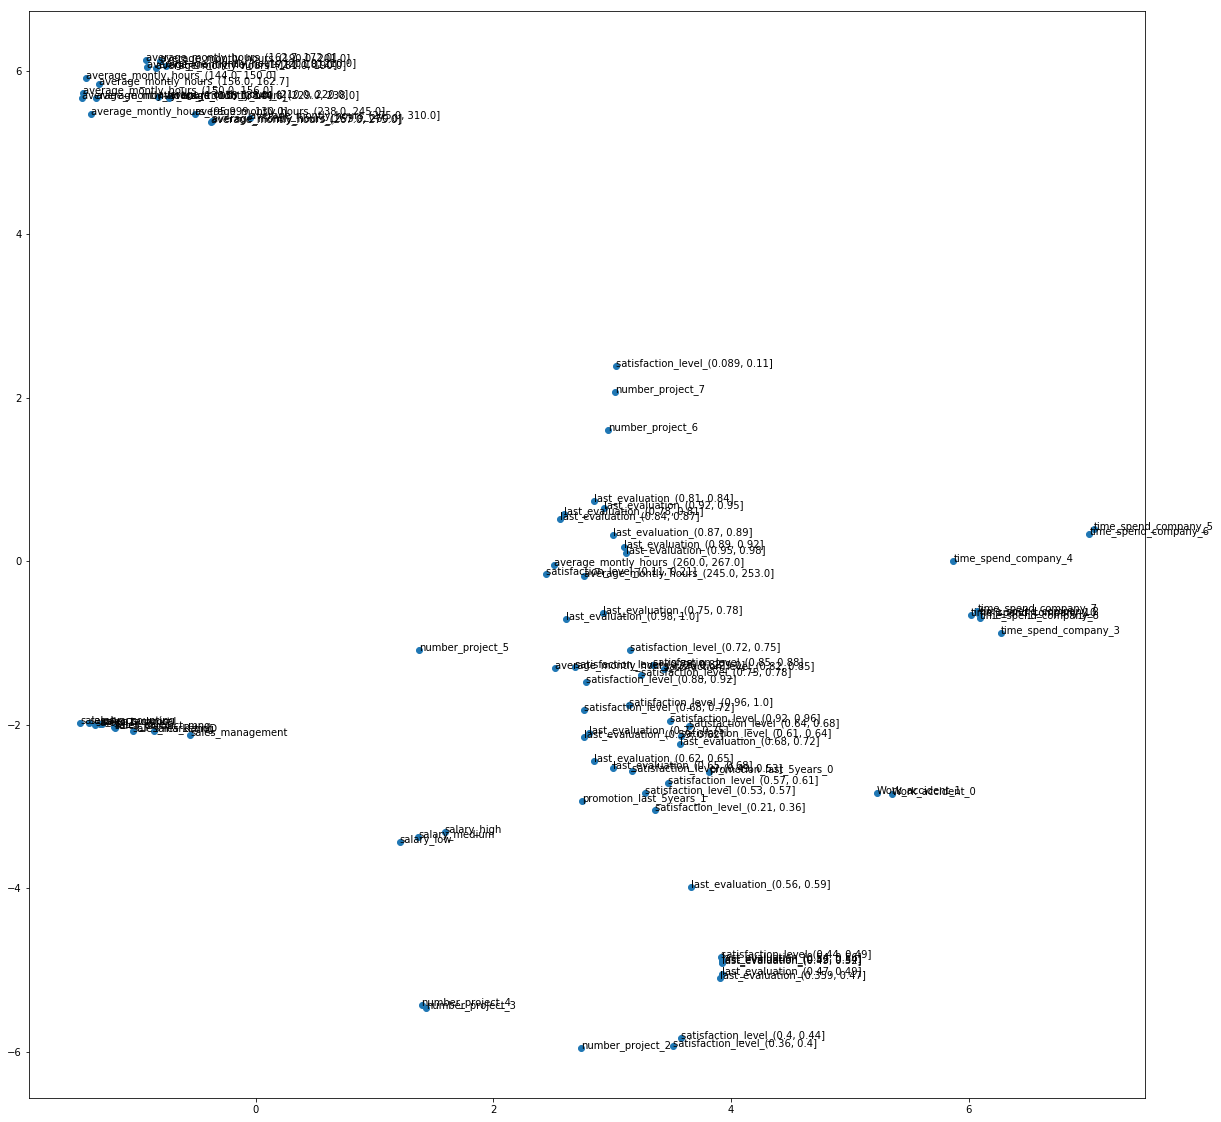

In [51]:
semantic_binning.visualize_bin_embeddings()

In [52]:
sbin_train_data = semantic_binning.transform(train_data)
sbin_val_data = semantic_binning.transform(val_data)

In [56]:
sbin_train_data.shape

(10500, 42)

In [55]:
sbin_val_data.shape

(4499, 42)

In [62]:
from sklearn.metrics import accuracy_score

In [63]:
logistic = LogisticRegression()
logistic.fit(sbin_train_data, train_data.left)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [64]:
accuracy_score(train_data.left, logistic.predict(sbin_train_data))

0.92533333333333334

In [65]:
accuracy_score(val_data.left, logistic.predict(sbin_val_data))

0.92420537897310517

In [74]:
for col, coef in sorted(zip(sbin_train_data.columns, logistic.coef_[0]), key=lambda x: -x[1]):
    if '_'.join(col.split('_')[:-1]) in ['satisfaction_level', 'average_montly_hours',
                                        'last_evaluation']:
        print(col, coef)

satisfaction_level_(0.089, 0.11] 4.16546262063
average_montly_hours_(260.0, 267.0] 0.827019321738
average_montly_hours_(245.0, 253.0] 0.650141459308
average_montly_hours_(229.0, 245.0] 0.626129734202
average_montly_hours_(253.0, 260.0] 0.602244294484
average_montly_hours_(220.0, 229.0] 0.580257269194
last_evaluation_(0.359, 0.56] 0.520788174959
last_evaluation_(0.75, 1.0] 0.245713377934
average_montly_hours_(130.0, 220.0] 0.041448712814
last_evaluation_(0.56, 0.75] -0.805188885007
satisfaction_level_(0.11, 1.0] -4.20414995274


In [69]:
data_handler_efb = DataHandler(train_data, var_dict)
train_efb = data_handler_efb.get_dummy_coded_data()

In [70]:
logistic_efb = LogisticRegression()
logistic_efb.fit(train_efb, train_data.left)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [71]:
accuracy_score(train_data.left, logistic_efb.predict(train_efb))

0.9582857142857143

In [75]:
for col, coef in sorted(zip(train_efb.columns, logistic_efb.coef_[0]), key=lambda x: -x[1]):
    if '_'.join(col.split('_')[:-1]) in ['satisfaction_level', 'average_montly_hours',
                                        'last_evaluation']:
        print(col, coef)

satisfaction_level_(0.089, 0.11] 6.68652198194
satisfaction_level_(0.36, 0.4] 2.32912770461
satisfaction_level_(0.4, 0.44] 2.29511870137
last_evaluation_(0.98, 1.0] 1.51293817311
satisfaction_level_(0.44, 0.49] 1.01971933988
last_evaluation_(0.52, 0.54] 0.929736746086
average_montly_hours_(130.0, 138.0] 0.854620986212
average_montly_hours_(260.0, 267.0] 0.804607955684
average_montly_hours_(275.0, 310.0] 0.745826280423
average_montly_hours_(150.0, 156.0] 0.715607476579
average_montly_hours_(238.0, 245.0] 0.647918451731
last_evaluation_(0.92, 0.95] 0.646564610191
average_montly_hours_(138.0, 144.0] 0.633862826444
last_evaluation_(0.84, 0.87] 0.632714227851
average_montly_hours_(245.0, 253.0] 0.628655684006
last_evaluation_(0.87, 0.89] 0.578547199148
average_montly_hours_(156.0, 162.7] 0.549260014542
average_montly_hours_(229.0, 238.0] 0.548739041502
average_montly_hours_(144.0, 150.0] 0.524873116892
average_montly_hours_(253.0, 260.0] 0.510831627217
average_montly_hours_(267.0, 275.0] 0.

In [ ]:
import numpy as np
import pandas as pd

from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier


    
class Experiment:
    
    def __init__(self, data_path, var_dict):
        self.data = pd.read_csv(data_path)
        self.var_dict = var_dict
        
    def _split_data(self, data, val_ratio=0.3):
        idxs = np.arange(0, len(data))
        np.random.shuffle(idxs)
        val_size = int(len(data) * val_ratio)
        train_data = data.iloc[idxs[val_size:]].reset_index(drop=True)
        val_data = data.iloc[idxs[:val_size]].reset_index(drop=True)
        return train_data, val_data
    
    def get_semantic_bins(self):
        
    train_data, val_data = split_data(hr_data)
    
    data_handler3 = DataHandler(train_data, var_dict)
    equal_freq_binned_data = data_handler3.get_dummy_coded_data()
    
    


    cv_score = cross_val_score(LogisticRegression(), X=dummy_coded_data, y=train_data.left,
                                cv=10, scoring='accuracy', n_jobs=10)
    print(cv_score.mean(), cv_score.std())
    cv_score = cross_val_score(LogisticRegression(), X=semantically_binned_data, y=val_data.left,
                                cv=10, scoring='accuracy', n_jobs=10)
    print(cv_score.mean(), cv_score.std())
    print('')

    cv_score = cross_val_score(BernoulliNB(), X=dummy_coded_data, y=train_data.left,
                                cv=10, scoring='accuracy', n_jobs=10)
    print(cv_score.mean(), cv_score.std())
    cv_score = cross_val_score(BernoulliNB(), X=semantically_binned_data, y=val_data.left,
                                cv=10, scoring='accuracy', n_jobs=10)
    print(cv_score.mean(), cv_score.std())
    print('')

    cv_score = cross_val_score(DecisionTreeClassifier(), X=dummy_coded_data, y=train_data.left,
                                cv=10, scoring='accuracy', n_jobs=10)
    print(cv_score.mean(), cv_score.std())
    cv_score = cross_val_score(DecisionTreeClassifier(), X=semantically_binned_data, y=val_data.left,
                                cv=10, scoring='accuracy', n_jobs=10)
    print(cv_score.mean(), cv_score.std())
    print('')

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

#### Equal Freq, Width로  train에 대해 구간을 구하고, 이걸 따와서 validation의 구간을 나눠야함

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import cross_val_score

cv_score = cross_val_score(LogisticRegression(), X=dummy_coded_data, y=train_data.left,
                            cv=10, scoring='accuracy', n_jobs=10)
print(cv_score.mean(), cv_score.std())
cv_score = cross_val_score(LogisticRegression(), X=semantically_binned_data, y=val_data.left,
                            cv=10, scoring='accuracy', n_jobs=10)
print(cv_score.mean(), cv_score.std())
print('')

cv_score = cross_val_score(BernoulliNB(), X=dummy_coded_data, y=train_data.left,
                            cv=10, scoring='accuracy', n_jobs=10)
print(cv_score.mean(), cv_score.std())
cv_score = cross_val_score(BernoulliNB(), X=semantically_binned_data, y=val_data.left,
                            cv=10, scoring='accuracy', n_jobs=10)
print(cv_score.mean(), cv_score.std())
print('')

cv_score = cross_val_score(DecisionTreeClassifier(), X=dummy_coded_data, y=train_data.left,
                            cv=10, scoring='accuracy', n_jobs=10)
print(cv_score.mean(), cv_score.std())
cv_score = cross_val_score(DecisionTreeClassifier(), X=semantically_binned_data, y=val_data.left,
                            cv=10, scoring='accuracy', n_jobs=10)
print(cv_score.mean(), cv_score.std())
print('')

/home/taewook/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


0.954948802675 0.00759199605284
0.923525163087 0.0127894825385

0.924470226277 0.00948656806268
0.892189256353 0.0110784572294

0.970950631248 0.00549676526339
0.946209686632 0.00496175074656



equal width로 잘라서, 비어 있는 구간이 발생. 임베딩 및 클러스터링 시 문제가 될 수 있음

구간이 노이지한것이 클러스터링 알고리즘 자체의 노이지 함 때문이라면 앙상블 클러스터링으로 해결 가능

그것이 아니라면, 클러스터링이 아니라 인접 구간부터 묶어 나가는 방식의 접근 필요

Binning이 유의미하게 되었는지를 판단하려면, Train data만 보고 구간을 잘라야 함

제대로 안되면 검증 데이터에서 성능 차이가 나야 함

In [20]:
# def find_nn(query, candidates, k=10, exclude_self=False):
#     embedding_of_query = embedding_by_column[query]
#     distances = dict()
#     for col, embedding in embedding_by_column.items():
#         distances[col] = np.linalg.norm(embedding - embedding_of_query)
#     knn = sorted(distances.items(), key=lambda x: x[1])
#     if exclude_self:
#         knn = knn[1:]
#     return knn[:k]

# find_nn('average_montly_hours_(150.0, 156.0]', embedding_by_column, k=10)